In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,X-Men Origins: Wolverine,2009
1,Feng liu mi yue,1994
2,Expiation,1922
3,Snap Judgment,1917
4,Kill Command,2016


In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
2,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
3,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
4,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN


### Using groupby(), plot the number of films that have been released each decade in the history of cinema.

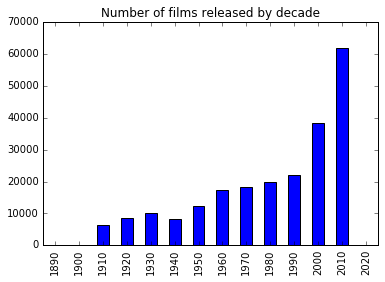

In [5]:
films_by_year = titles['year'].value_counts().sort_index()
films_by_decade = films_by_year.groupby(films_by_year.index // 10 * 10).sum()
films_by_decade.plot(kind='bar', title='Number of films released by decade')

### Use groupby() to plot the number of "Hamlet" films made each decade.

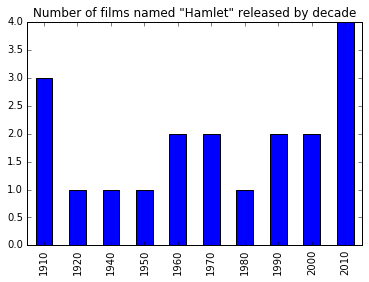

In [6]:
Hamlet_films_by_year = titles[titles['title'] == 'Hamlet']['year'].value_counts().sort_index()
Hamlet_films_by_decade = Hamlet_films_by_year.groupby(Hamlet_films_by_year.index // 10 * 10).sum()
Hamlet_films_by_decade.plot(kind='bar', title='Number of films named "Hamlet" released by decade')

### How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?

In [10]:
leading_roles_1950s = cast[(cast['n'] == 1) & (cast['year'] // 10 == 195)].groupby(['type','year']).size()
leading_roles_1950s

type     year
actor    1950    615
         1951    643
         1952    598
         1953    641
         1954    635
         1955    620
         1956    631
         1957    716
         1958    703
         1959    692
actress  1950    277
         1951    275
         1952    288
         1953    294
         1954    303
         1955    272
         1956    296
         1957    291
         1958    280
         1959    305
dtype: int64

### In the 1950s decade taken as a whole, how many total roles were available to actors, and how many to actresses, for each "n" number 1 through 5?

In [11]:
roles_1950s_n15 = cast[(cast['year'] // 10 == 195) & 
                       (cast['n'] <= 5) & 
                       (cast['n'] >= 1)].groupby(['type','n']).size()
roles_1950s_n15

type     n  
actor    1.0    6494
         2.0    4462
         3.0    5489
         4.0    5484
         5.0    5512
actress  1.0    2881
         2.0    4481
         3.0    3092
         4.0    2799
         5.0    2496
dtype: int64

### Use groupby() to determine how many roles are listed for each of the Pink Panther movies.

In [13]:
pink_panther_cast_sizes = cast[cast['title'].str.contains('Pink Panther')].groupby('title').size()
pink_panther_cast_sizes

title
Curse of the Pink Panther          67
Revenge of the Pink Panther        64
Son of the Pink Panther            46
The Pink Panther                  108
The Pink Panther 2                 82
The Pink Panther Strikes Again     73
The Return of the Pink Panther     30
Trail of the Pink Panther          40
dtype: int64

### List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [14]:
Frank_Oz = cast[cast['name'] == 'Frank Oz'].groupby(['year','title']).size()

In [17]:
Frank_Oz[Frank_Oz > 1]

year  title                               
1979  The Muppet Movie                        8
1981  An American Werewolf in London          2
      The Great Muppet Caper                  6
1982  The Dark Crystal                        2
1984  The Muppets Take Manhattan              7
1985  Follow That Bird                        3
1992  The Muppet Christmas Carol              7
1996  Muppet Treasure Island                  4
1999  Muppets from Space                      4
      The Adventures of Elmo in Grouchland    3
dtype: int64

### List each of the characters that Frank Oz has portrayed at least twice.

In [18]:
Frank_Oz_characters = cast[cast['name'] == 'Frank Oz'].groupby('character').size()
Frank_Oz_characters[Frank_Oz_characters >= 2]

character
Animal            6
Bert              3
Cookie Monster    3
Fozzie Bear       4
Grover            2
Miss Piggy        6
Sam the Eagle     5
Yoda              6
dtype: int64